In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import numpy as np
import os

#DATA_DIR = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/data_split'
DATA_DIR_Sentiment_Titolo = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/data_split_titolo'
MODEL_DIR = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/models/price_models'
CNN_MODEL_PATH = os.path.join(MODEL_DIR, 'best_cnn_spy_model.keras')

In [8]:
X_train = np.load(os.path.join(DATA_DIR_Sentiment_Titolo, 'X_train.npy'))
y_train = np.load(os.path.join(DATA_DIR_Sentiment_Titolo, 'y_train.npy'))
X_val   = np.load(os.path.join(DATA_DIR_Sentiment_Titolo, 'X_val.npy'))
y_val   = np.load(os.path.join(DATA_DIR_Sentiment_Titolo, 'y_val.npy'))
# aggiunta per utilizzare solo i dati tecnici
X_train = X_train[:, :, :-1]
X_val   = X_val[:, :, :-1]

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val_cnn   = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)

print(f"Shape per CNN:   {X_train_cnn.shape}")

model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(2, 2), 
                 activation='relu', 
                 input_shape=(X_train.shape[1], X_train.shape[2], 1)))
 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, 
                 kernel_size=(2, 2), 
                 activation='relu'))

model.add(Flatten()) 
model.add(Dense(units=1)) 

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1),
    ModelCheckpoint(filepath=CNN_MODEL_PATH, monitor='val_loss', save_best_only=True, verbose=1)
]

history = model.fit(
    X_train_cnn, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_cnn, y_val),
    callbacks=callbacks_list,
    verbose=1
)

print(f"\n Training completato. Modello salvato in: {CNN_MODEL_PATH}")

Shape per CNN:   (1104, 60, 6, 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 59, 5, 32)      │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 2, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 1, 64)      │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,793 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,209 (39.88 KB)

 Trainable params: 10,209 (39.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0716  
Epoch 1: val_loss improved from None to 0.00869, saving model to C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/models/price_models\best_cnn_spy_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0247 - val_loss: 0.0087 - learning_rate: 0.0010
Epoch 2/100
24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034
Epoch 2: val_loss did not improve from 0.00869
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - val_loss: 0.0118 - learning_rate: 0.0010
Epoch 3/100
25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018
Epoch 3: val_loss did not improve from 0.00869
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - val_loss: 0.0094 - learning_rate: 0.0010
Epoch 4/100
23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012    
Epoch 4: val_loss did not improve from 0.00869
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - val_loss: 0.0108 - learning_rate: 0.0010
Epoch 5/100
35/35 ━

Generazione predizioni per CNN...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
--- Risultati CNN ---
MSE: $333.88
RMSE: $18.27
Primo prezzo (Reale): $396.85
Ultimo prezzo (Reale): $476.69


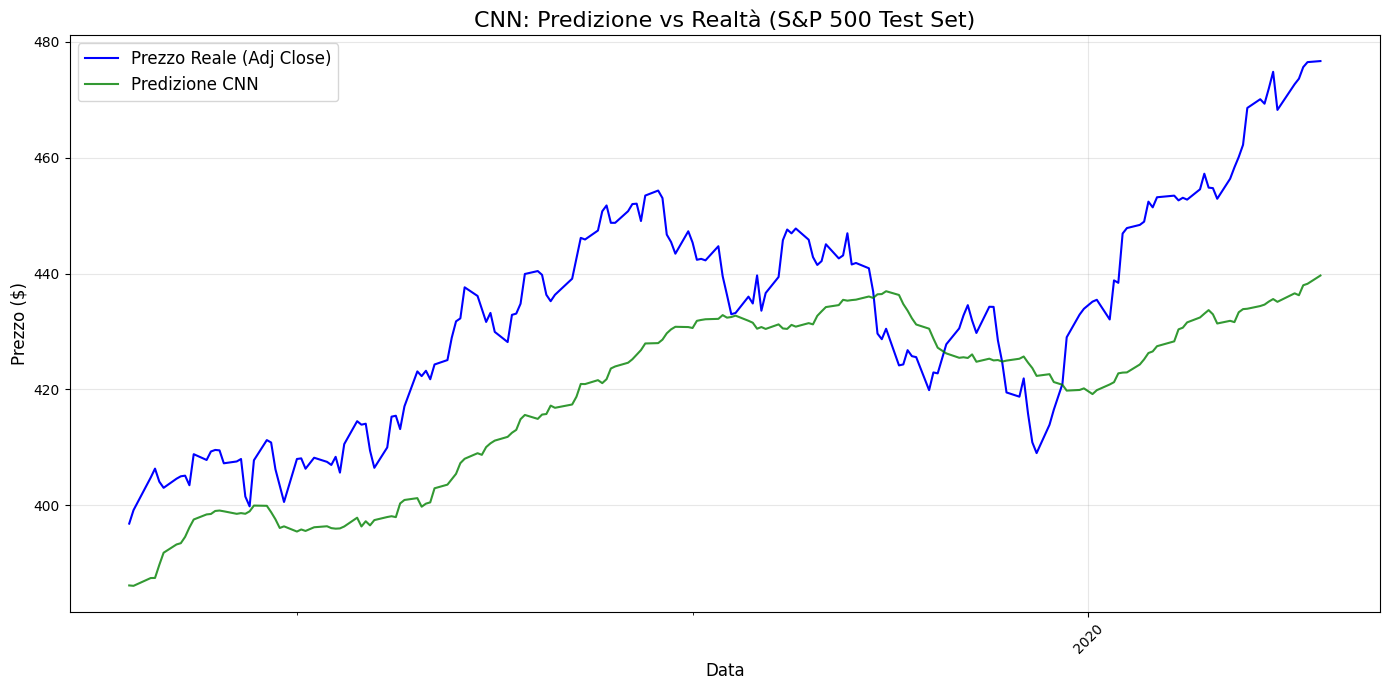

In [10]:
import os
import sys
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
import joblib
import numpy as np
from tensorflow.keras.models import load_model
from utils.visualizzazione import evaluate_and_plot

CSV_PATH = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/SPY.csv'
MODEL_PATH = 'C:/Users/angel/OneDrive/Desktop/ProgettoMeDL/Financial_Forecasting_XAI/models/price_models/best_cnn_spy_model.keras'
SCALER_PATH = os.path.join(DATA_DIR_Sentiment_Titolo, 'scaler.pkl')

# 1. Caricamento dati
X_test = np.load(os.path.join(DATA_DIR_Sentiment_Titolo, 'X_test.npy'))
y_test = np.load(os.path.join(DATA_DIR_Sentiment_Titolo, 'y_test.npy'))

# -------------------------------------------------------------
# 2. RIMOZIONE SENTIMENT (Passaggio Fondamentale)
# -------------------------------------------------------------
# Rimuovi l'ultima colonna PRIMA di fare il reshape
X_test = X_test[:, :, :-1] 
# Ora X_test ha shape (..., 60, 6)

# 3. Gestione Scaler
scaler_data = joblib.load(SCALER_PATH)
scaler = scaler_data['financial']
model = load_model(MODEL_PATH)

# 4. Reshape per CNN
# Ora shape[2] vale 6, quindi la dimensione finale sarà corretta: (..., 60, 6, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

evaluate_and_plot(
    model=model,
    X_test=X_test_cnn,   
    y_test=y_test,
    scaler=scaler,
    csv_path=CSV_PATH,
    model_name='CNN',
    color='green'
)